# Importing Necessary Libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


# Creating and Visualizing Data

In [6]:
# Creating dataset
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100).reshape(-1, 1)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100).reshape(-1, 1)
print("X datasets::: ",X)
print("y datasets::: ",y)

X datasets:::  [[-3.29215704]
 [ 0.79952837]
 [-0.93621395]
 [-4.7226796 ]
 [-3.60267397]
 [ 4.93183364]
 [-0.85026525]
 [ 2.45407162]
 [ 2.30965656]
 [ 0.76820449]
 [ 1.56786929]
 [-2.36282052]
 [-0.28311318]
 [ 1.63497495]
 [ 0.6684103 ]
 [ 0.99897702]
 [-2.48223722]
 [ 2.61547479]
 [ 1.0607969 ]
 [ 4.56228722]
 [ 9.65896945]
 [ 0.03914421]
 [-0.5933086 ]
 [ 4.22649506]
 [-4.80926387]
 [ 6.36309702]
 [ 1.86272445]
 [ 2.56155155]
 [-2.59833764]
 [-2.40807631]
 [ 1.53515772]
 [ 0.86551244]
 [ 4.66335724]
 [ 7.9423894 ]
 [ 3.04373645]
 [ 1.53095309]
 [-1.69087204]
 [-1.60713955]
 [ 3.16198045]
 [ 2.90690825]
 [ 5.1456589 ]
 [ 6.26005381]
 [ 7.11881057]
 [-3.85232619]
 [ 3.52895655]
 [ 3.3142229 ]
 [ 5.75838608]
 [-0.33247107]
 [ 6.84169354]
 [ 2.63822084]
 [ 4.68639968]
 [ 0.83929251]
 [ 3.53241541]
 [ 5.54189655]
 [ 2.08454669]
 [ 0.71500439]
 [ 1.80044833]
 [ 1.09258431]
 [ 3.90296628]
 [ 3.0882235 ]
 [ 4.01738134]
 [ 3.07865948]
 [ 4.43943885]
 [ 7.17884781]
 [ 1.46772157]
 [ 3.20534

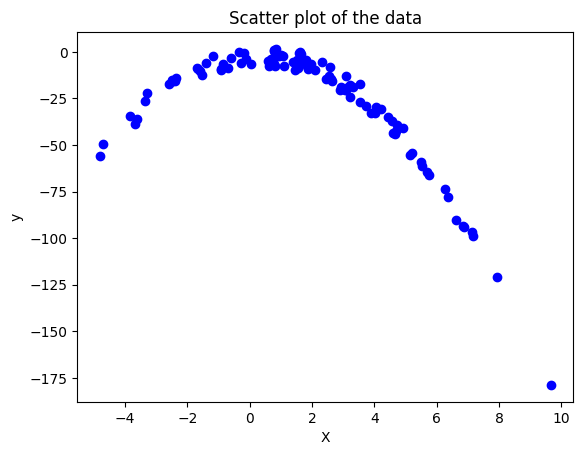

In [3]:
# Visualize the data
plt.scatter(X, y, color='blue')
plt.title('Scatter plot of the data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


# Split Data into Train and Test Sets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# x_train

# y_test

array([[-90.41213081],
       [ -8.48800897],
       [ -4.3028723 ],
       [-56.15100543],
       [-14.96348454],
       [-30.52086825],
       [ -9.50066208],
       [ -8.01374995],
       [-17.08417039],
       [ -0.98111637],
       [  0.54264241],
       [ -5.52488631],
       [-43.34614728],
       [ -4.02914447],
       [-22.31930087],
       [ -6.2621227 ],
       [-49.42189464],
       [-15.78335383],
       [-13.0890328 ],
       [ -7.82487216]])

# Applying Simple linear regression

In [16]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# y_pred

array([[-63.00671736],
       [-22.21842643],
       [-24.35119359],
       [ 28.78667326],
       [ 10.07886442],
       [-43.85506063],
       [ -2.35017575],
       [-30.46997761],
       [ 11.01223771],
       [-23.02089322],
       [-16.26024799],
       [-20.93226799],
       [-46.95742124],
       [-15.25033045],
       [ 16.59010275],
       [-10.19143279],
       [ 28.09059096],
       [  9.48265805],
       [-34.62719531],
       [-24.60086111]])

In [17]:
print("R2 Score for Linear Regression:", r2_score(y_test, y_pred))

R2 Score for Linear Regression: -1.0552991792855355


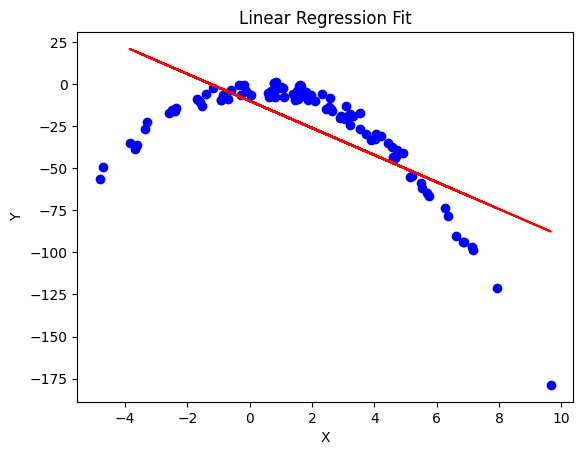

In [18]:

plt.scatter(X, y, color='blue')
plt.plot(x_train, lr.predict(x_train), color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.show()


# Applying Polynomial Regression

In [21]:
# Applying polynomial regression with degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

# x_train_trans

In [22]:

lr_poly = LinearRegression()
lr_poly.fit(x_train_trans, y_train)
y_pred_poly = lr_poly.predict(x_test_trans)


In [ ]:
print("R2 Score for Polynomial Regression:", r2_score(y_test, y_pred_poly))

# Visualize Polynomial Regression
X_new = np.linspace(min(X), max(X), 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr_poly.predict(X_new_poly)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.scatter(x_train, y_train, color="blue", label='Training points')
plt.scatter(x_test, y_test, color="green", label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression Fit")
plt.show()

print("Polynomial Coefficients:", lr_poly.coef_)
print("Polynomial Intercept:", lr_poly.intercept_)
